### Import Dependencies

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Import Dataframe

In [9]:
df = pd.read_csv('wines_SPA.csv')

### Data Cleaning

In [11]:
df.sample(5)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
5731,Mar de Frades,Rias Baixas Albarino Finca Valinas,2015,4.2,414,Espana,Rias Baixas,16.78,Albarino,3.0,3.0
3229,Imperial,Rioja Reserva,2004,4.2,417,Espana,Rioja,45.00,Rioja Red,4.0,3.0
6675,Remirez de Ganuza,Rioja Blanco,2017,4.2,421,Espana,Rioja,29.15,Rioja White,3.0,3.0
6149,Sei Solo,Preludio,2016,4.2,388,Espana,Ribera del Duero,31.63,Ribera Del Duero Red,NaN,NaN
3129,Imperial,Rioja Reserva,2004,4.2,417,Espana,Rioja,45.00,Rioja Red,4.0,3.0


In [12]:
df['winery'].unique()

array(['Teso La Monja', 'Artadi', 'Vega Sicilia', 'Pago de Carraovejas',
       'Toro Albala', 'Bodegas El Nido', 'Valdespino',
       'Dominio de Pingus', 'Alvaro Palacios', 'Ordonez',
       'Bodegas Valduero', 'Vina Sastre', 'Sierra Cantabria',
       'Descendientes de J. Palacios', 'La Rioja Alta',
       'Marques de Murrieta', 'Vinedos de Paganos', 'Emilio Moro',
       'Quinta de la Quietud', 'Bodegas Mauro',
       'Bodega Contador (Benjamin Romeo)', 'Remirez de Ganuza',
       'Bodegas San Roman', 'Pago de Los Capellanes', 'Bodega Numanthia',
       'Alto Moncayo', 'Mas Doix', 'Finca Moncloa', 'Bodegas Roda',
       'Martinet', 'Recaredo', 'Clos Erasmus', 'Barbadillo',
       'Gonzalez-Byass', 'Bodegas Amaren', 'Alvear', 'Equipo Navazos',
       'Morca', 'Territorio Luthier', 'Rafael Palacios', 'Terra Remota',
       'Dehesa de Los Canonigos', 'Miguel Merino', 'Gutierrez de la Vega',
       'Alion', 'Aalto', 'Carmelo Rodero', 'Dominio del Bendito',
       "Mas d'en Gil", 'Casa 

In [13]:
df['type'].unique()

array(['Toro Red', 'Tempranillo', 'Ribera Del Duero Red', 'Pedro Ximenez',
       'Red', 'Sherry', 'Priorat Red', 'Rioja Red', 'Rioja White',
       'Grenache', nan, 'Cava', 'Verdejo', 'Syrah', 'Monastrell',
       'Mencia', 'Sparkling', 'Montsant Red', 'Albarino', 'Chardonnay',
       'Cabernet Sauvignon', 'Sauvignon Blanc'], dtype=object)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [15]:
df['country'].unique()

array(['Espana'], dtype=object)

In [16]:
# As there is only ! country, drop the column
df = df.drop(columns = ['country'])

In [17]:
df.head()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [18]:
# Convert Year to How old is the wine
df['year'] = pd.to_numeric(df['year'], errors='coerce')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7210 non-null   float64
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   region       7500 non-null   object 
 6   price        7500 non-null   float64
 7   type         6955 non-null   object 
 8   body         6331 non-null   float64
 9   acidity      6331 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 586.1+ KB


### Fill Na values of year, body and acidity

In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [22]:
df['year'] = imputer.fit_transform(df[['year']])
df['body'] = imputer.fit_transform(df[['body']])
df['acidity'] = imputer.fit_transform(df[['acidity']])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7500 non-null   float64
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   region       7500 non-null   object 
 6   price        7500 non-null   float64
 7   type         6955 non-null   object 
 8   body         7500 non-null   float64
 9   acidity      7500 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 586.1+ KB


In [24]:
# Find how old the wine is:
df['year'] = 2024 - df['year']

In [25]:
df.head()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,11.0,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,6.0,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,15.0,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,25.0,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,28.0,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [26]:
df = df.rename(columns = {'year':'years_old'})

In [27]:
df.head()

,winery,wine,years_old,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,11.0,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,6.0,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,15.0,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,25.0,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,28.0,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   years_old    7500 non-null   float64
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   region       7500 non-null   object 
 6   price        7500 non-null   float64
 7   type         6955 non-null   object 
 8   body         7500 non-null   float64
 9   acidity      7500 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 586.1+ KB


In [29]:
df = df.sort_values(by = 'num_reviews', ascending = False)

In [30]:
df.head()

,winery,wine,years_old,rating,num_reviews,region,price,type,body,acidity
1822,Felix Solis,Mucho Mas Tinto,9.0,4.2,32624,Vino de Espana,4.99,Red,4.0,3.0
1823,Marques de Riscal,Rioja Reserva,8.0,4.2,16505,Rioja,15.90,Rioja Red,4.0,3.0
46,Vega Sicilia,Unico Reserva Especial Edicion,9.0,4.7,12421,Ribera del Duero,423.50,Ribera Del Duero Red,5.0,3.0
1114,La Rioja Alta,Vina Ardanza Reserva,15.0,4.3,10273,Rioja,24.38,Rioja Red,4.0,3.0
1824,La Rioja Alta,Vina Ardanza Reserva,17.0,4.2,9098,Rioja,23.70,Rioja Red,4.0,3.0


In [31]:
average_rating_per_winery = df.groupby('winery')['rating'].mean().reset_index()
average_rating_per_winery.columns = ['winery', 'average_rating']

In [32]:
# Merge the average rating back to the original DataFrame
df = df.merge(average_rating_per_winery, on='winery', how='left')

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le = LabelEncoder()

In [35]:
df.head()

,winery,wine,years_old,rating,num_reviews,region,price,type,body,acidity,average_rating
0,Felix Solis,Mucho Mas Tinto,9.0,4.2,32624,Vino de Espana,4.99,Red,4.0,3.0,4.200000
1,Marques de Riscal,Rioja Reserva,8.0,4.2,16505,Rioja,15.90,Rioja Red,4.0,3.0,4.323810
2,Vega Sicilia,Unico Reserva Especial Edicion,9.0,4.7,12421,Ribera del Duero,423.50,Ribera Del Duero Red,5.0,3.0,4.671134
3,La Rioja Alta,Vina Ardanza Reserva,15.0,4.3,10273,Rioja,24.38,Rioja Red,4.0,3.0,4.221654
4,La Rioja Alta,Vina Ardanza Reserva,17.0,4.2,9098,Rioja,23.70,Rioja Red,4.0,3.0,4.221654


In [36]:
le.fit(df['wine'])
df['wine'] = le.transform(df['wine'])

In [37]:
df.head()

,winery,wine,years_old,rating,num_reviews,region,price,type,body,acidity,average_rating
0,Felix Solis,507,9.0,4.2,32624,Vino de Espana,4.99,Red,4.0,3.0,4.200000
1,Marques de Riscal,669,8.0,4.2,16505,Rioja,15.90,Rioja Red,4.0,3.0,4.323810
2,Vega Sicilia,779,9.0,4.7,12421,Ribera del Duero,423.50,Ribera Del Duero Red,5.0,3.0,4.671134
3,La Rioja Alta,815,15.0,4.3,10273,Rioja,24.38,Rioja Red,4.0,3.0,4.221654
4,La Rioja Alta,815,17.0,4.2,9098,Rioja,23.70,Rioja Red,4.0,3.0,4.221654


In [38]:
df.describe()

,wine,years_old,rating,num_reviews,price,body,acidity,average_rating
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,467.920267,10.446000,4.254933,451.109067,60.095822,4.133733,2.954933,4.254933
std,231.513538,6.811104,0.118029,723.001856,150.356676,0.539031,0.228858,0.098826
min,0.000000,3.000000,4.200000,25.000000,4.990000,2.000000,1.000000,4.200000
25%,260.000000,7.000000,4.200000,389.000000,18.900000,4.000000,3.000000,4.201345
50%,496.000000,9.000000,4.200000,404.000000,28.530000,4.000000,3.000000,4.203965
75%,666.000000,13.000000,4.200000,415.000000,51.350000,4.000000,3.000000,4.242912
max,846.000000,114.000000,4.900000,32624.000000,3119.080000,5.000000,3.000000,4.700000


In [39]:
df.region.unique()

array(['Vino de Espana', 'Rioja', 'Ribera del Duero', 'Cataluna',
       'Sardon de Duero', 'Toro', 'Rias Baixas', 'Castilla y Leon',
       'Priorato', 'Jumilla', 'Penedes', 'Rioja Alta', 'Valdeorras',
       'Almansa', 'Campo de Borja', 'Jerez Oloroso', 'Cadiz', 'Cava',
       'Jerez Palo Cortado', 'Rueda', 'Jerez-Xeres-Sherry', 'Alicante',
       'Jerez Amontillado', 'Emporda', 'Jerez Pedro Ximenes (PX)',
       'Navarra', 'Costers del Segre', 'Utiel-Requena', 'Valencia',
       'Mallorca', 'Yecla', 'Bierzo', 'Somontano', 'Sierras de Malaga',
       'Jerez Cream', 'Conca de Barbera', 'Malaga', 'Pla de Bages',
       'Galicia', 'La Palma', 'Ribeiro', 'Montilla-Moriles', 'Aragon',
       'El Terrerazo', 'Castilla', 'Binissalem-Mallorca', 'Calatayud',
       'Madrid', 'Andalucia', 'Ribeira Sacra', 'Pla i Llevant',
       'Montsant', 'Dominio de Valdepusa', 'Rioja Alavesa', 'Arinzano',
       'Tarragona', 'Extremadura', 'Alella', 'Tierra del Vino de Zamora',
       'Murcia', 'Pago Calza

#### Text encoding Techniques

In [41]:
le.fit(df['region'])
df['Region'] = le.transform(df['region'])

In [42]:
df.head()

,winery,wine,years_old,rating,num_reviews,region,price,type,body,acidity,average_rating,Region
0,Felix Solis,507,9.0,4.2,32624,Vino de Espana,4.99,Red,4.0,3.0,4.200000,74
1,Marques de Riscal,669,8.0,4.2,16505,Rioja,15.90,Rioja Red,4.0,3.0,4.323810,59
2,Vega Sicilia,779,9.0,4.7,12421,Ribera del Duero,423.50,Ribera Del Duero Red,5.0,3.0,4.671134,57
3,La Rioja Alta,815,15.0,4.3,10273,Rioja,24.38,Rioja Red,4.0,3.0,4.221654,59
4,La Rioja Alta,815,17.0,4.2,9098,Rioja,23.70,Rioja Red,4.0,3.0,4.221654,59


In [43]:
df = df.drop(columns = ['region'])

In [44]:
df.head()

,winery,wine,years_old,rating,num_reviews,price,type,body,acidity,average_rating,Region
0,Felix Solis,507,9.0,4.2,32624,4.99,Red,4.0,3.0,4.200000,74
1,Marques de Riscal,669,8.0,4.2,16505,15.90,Rioja Red,4.0,3.0,4.323810,59
2,Vega Sicilia,779,9.0,4.7,12421,423.50,Ribera Del Duero Red,5.0,3.0,4.671134,57
3,La Rioja Alta,815,15.0,4.3,10273,24.38,Rioja Red,4.0,3.0,4.221654,59
4,La Rioja Alta,815,17.0,4.2,9098,23.70,Rioja Red,4.0,3.0,4.221654,59


In [45]:
le.fit(df['type'])
df['Type'] = le.transform(df['type'])

In [46]:
df = df.drop(columns = ['type'])

In [47]:
df.head()

,winery,wine,years_old,rating,num_reviews,price,body,acidity,average_rating,Region,Type
0,Felix Solis,507,9.0,4.2,32624,4.99,4.0,3.0,4.200000,74,10
1,Marques de Riscal,669,8.0,4.2,16505,15.90,4.0,3.0,4.323810,59,12
2,Vega Sicilia,779,9.0,4.7,12421,423.50,5.0,3.0,4.671134,57,11
3,La Rioja Alta,815,15.0,4.3,10273,24.38,4.0,3.0,4.221654,59,12
4,La Rioja Alta,815,17.0,4.2,9098,23.70,4.0,3.0,4.221654,59,12


In [48]:
df = df.drop(columns = ['winery', 'rating'])

In [49]:
df.head()

,wine,years_old,num_reviews,price,body,acidity,average_rating,Region,Type
0,507,9.0,32624,4.99,4.0,3.0,4.200000,74,10
1,669,8.0,16505,15.90,4.0,3.0,4.323810,59,12
2,779,9.0,12421,423.50,5.0,3.0,4.671134,57,11
3,815,15.0,10273,24.38,4.0,3.0,4.221654,59,12
4,815,17.0,9098,23.70,4.0,3.0,4.221654,59,12


In [50]:
df['num_reviews'].unique()

array([32624, 16505, 12421, 10273,  9098,  9092,  8318,  7825,  7529,
        7435,  7401,  7294,  7293,  7237,  6803,  6567,  6532,  6521,
        6395,  6345,  6256,  6163,  5938,  5863,  5802,  5732,  5614,
        5545,  5372,  5365,  5266,  5204,  5178,  5152,  5116,  5109,
        4994,  4979,  4935,  4851,  4767,  4747,  4685,  4625,  4610,
        4516,  4457,  4411,  4357,  4350,  4266,  4127,  4121,  4091,
        4023,  3997,  3929,  3829,  3825,  3788,  3725,  3660,  3648,
        3620,  3608,  3589,  3587,  3545,  3524,  3521,  3456,  3453,
        3443,  3437,  3406,  3383,  3354,  3327,  3239,  3225,  3224,
        3197,  3164,  3148,  3127,  3118,  3101,  3095,  3093,  3089,
        2990,  2936,  2935,  2923,  2911,  2901,  2887,  2858,  2844,
        2826,  2820,  2788,  2783,  2765,  2712,  2710,  2705,  2685,
        2676,  2575,  2551,  2546,  2530,  2480,  2478,  2453,  2423,
        2419,  2418,  2416,  2375,  2370,  2364,  2341,  2295,  2271,
        2241,  2234,

In [51]:
# Remove tuples with reviews less than 200
df_filtered = df[~(df['num_reviews'] < 200)]

In [52]:
df_filtered.head()

,wine,years_old,num_reviews,price,body,acidity,average_rating,Region,Type
0,507,9.0,32624,4.99,4.0,3.0,4.200000,74,10
1,669,8.0,16505,15.90,4.0,3.0,4.323810,59,12
2,779,9.0,12421,423.50,5.0,3.0,4.671134,57,11
3,815,15.0,10273,24.38,4.0,3.0,4.221654,59,12
4,815,17.0,9098,23.70,4.0,3.0,4.221654,59,12


### Data Visualisaation

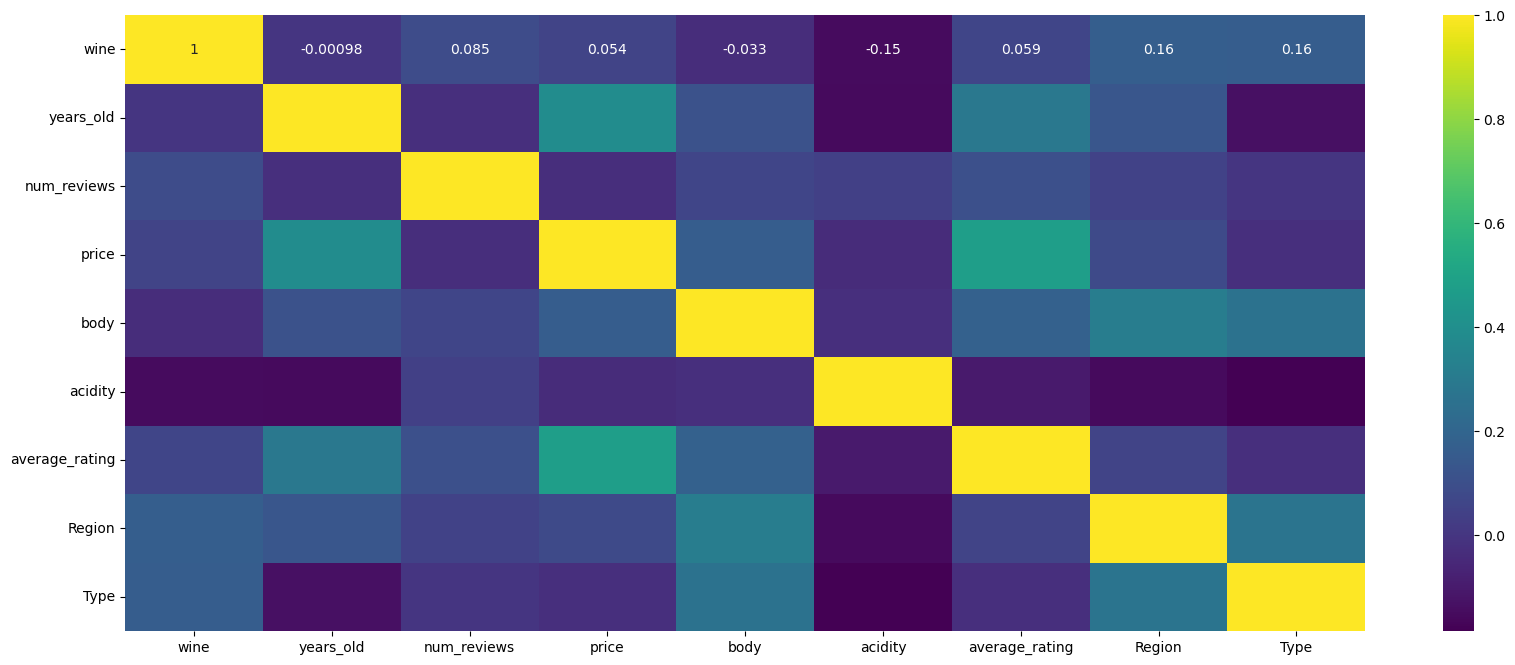

In [54]:
corr_matrix = df.corr()
plt.figure(figsize = (20,8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.show()

In [55]:
df = df.drop(columns = ['num_reviews', 'average_rating', 'price'])

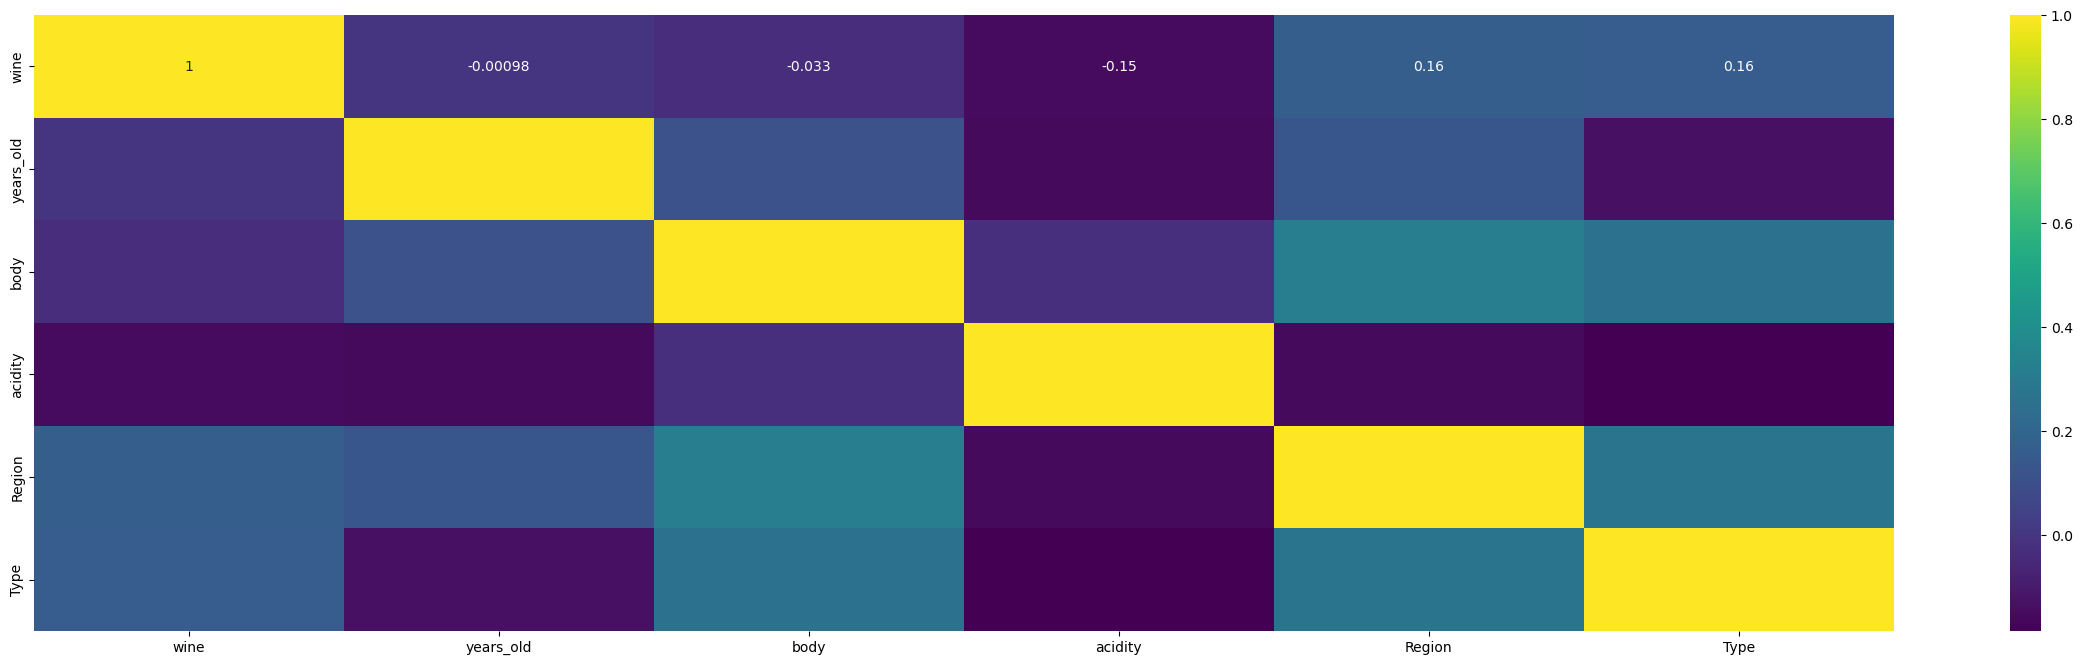

In [56]:
corr_matrix = df.corr()
plt.figure(figsize = (30,8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.show()

In [57]:
features = [col for col in df.columns if col not in ['Type']]

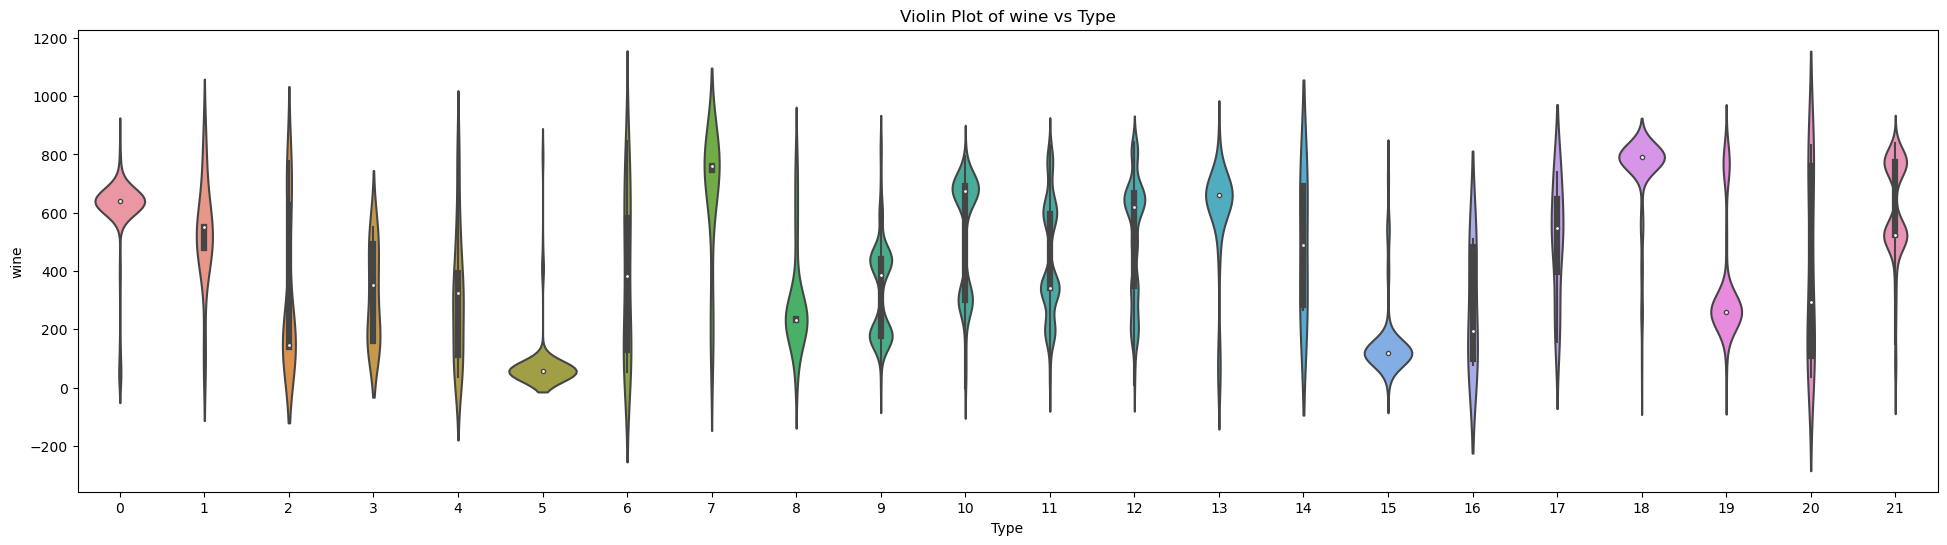

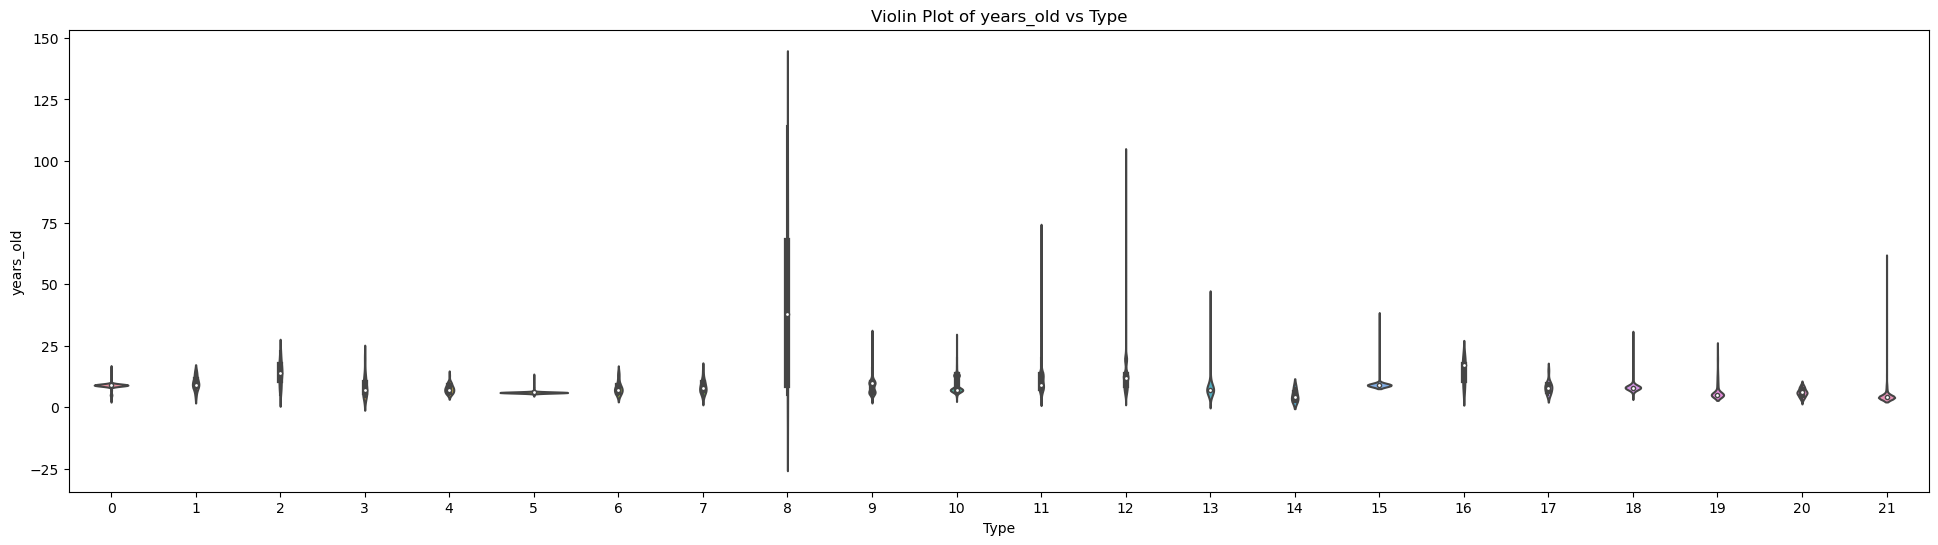

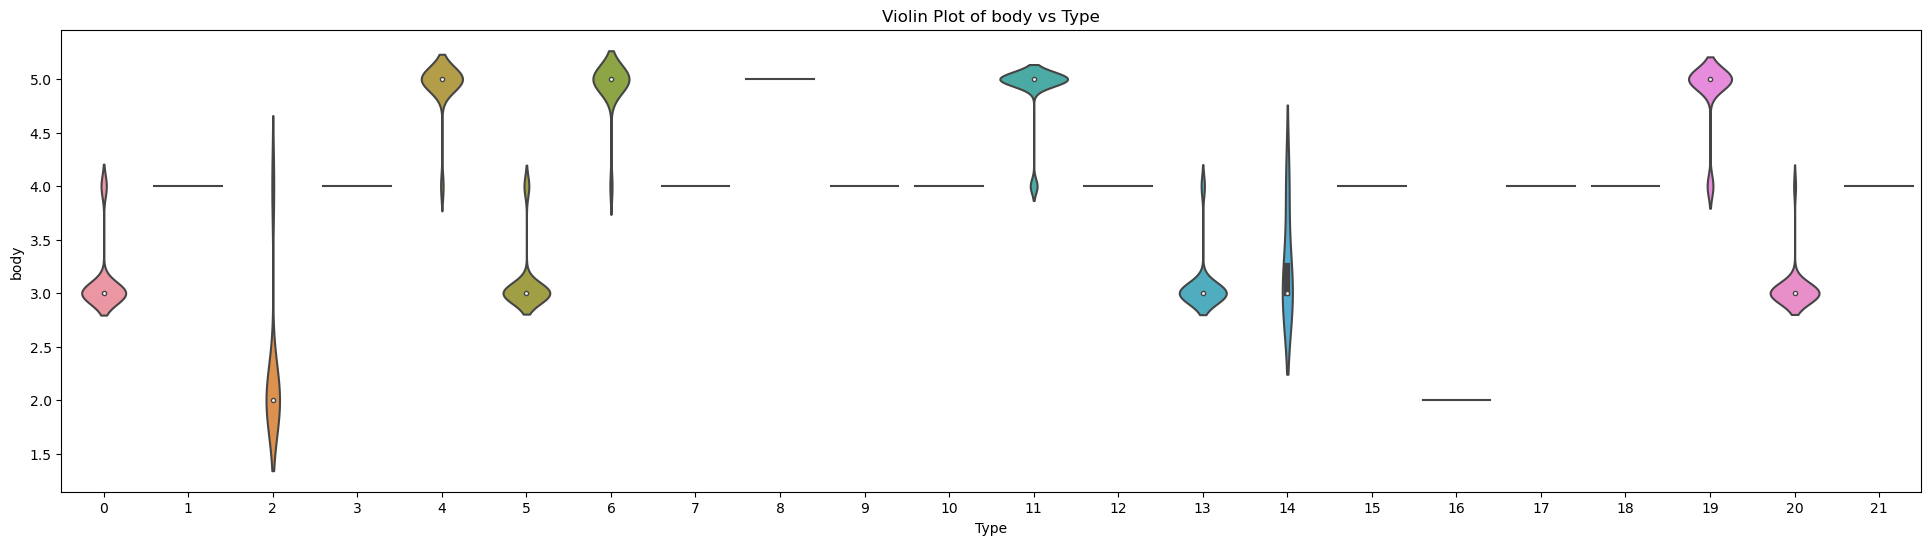

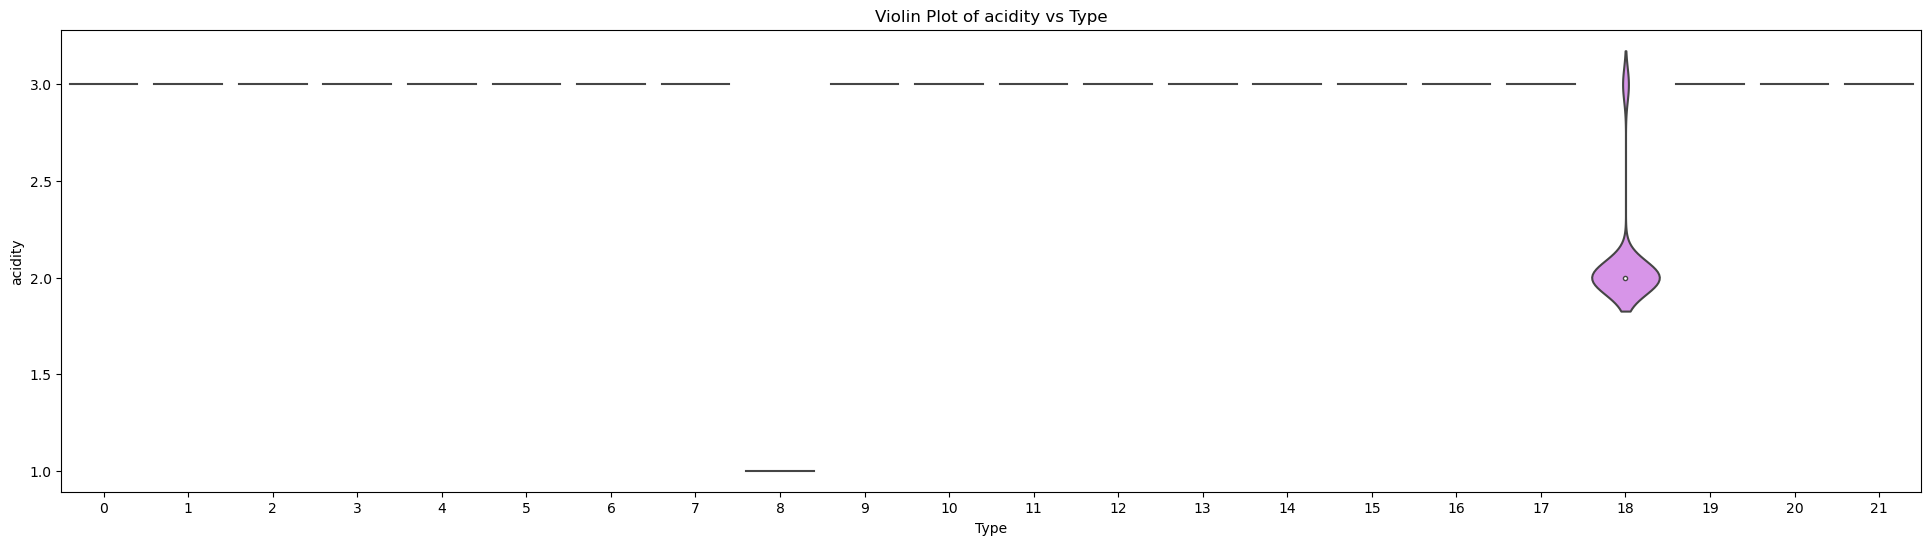

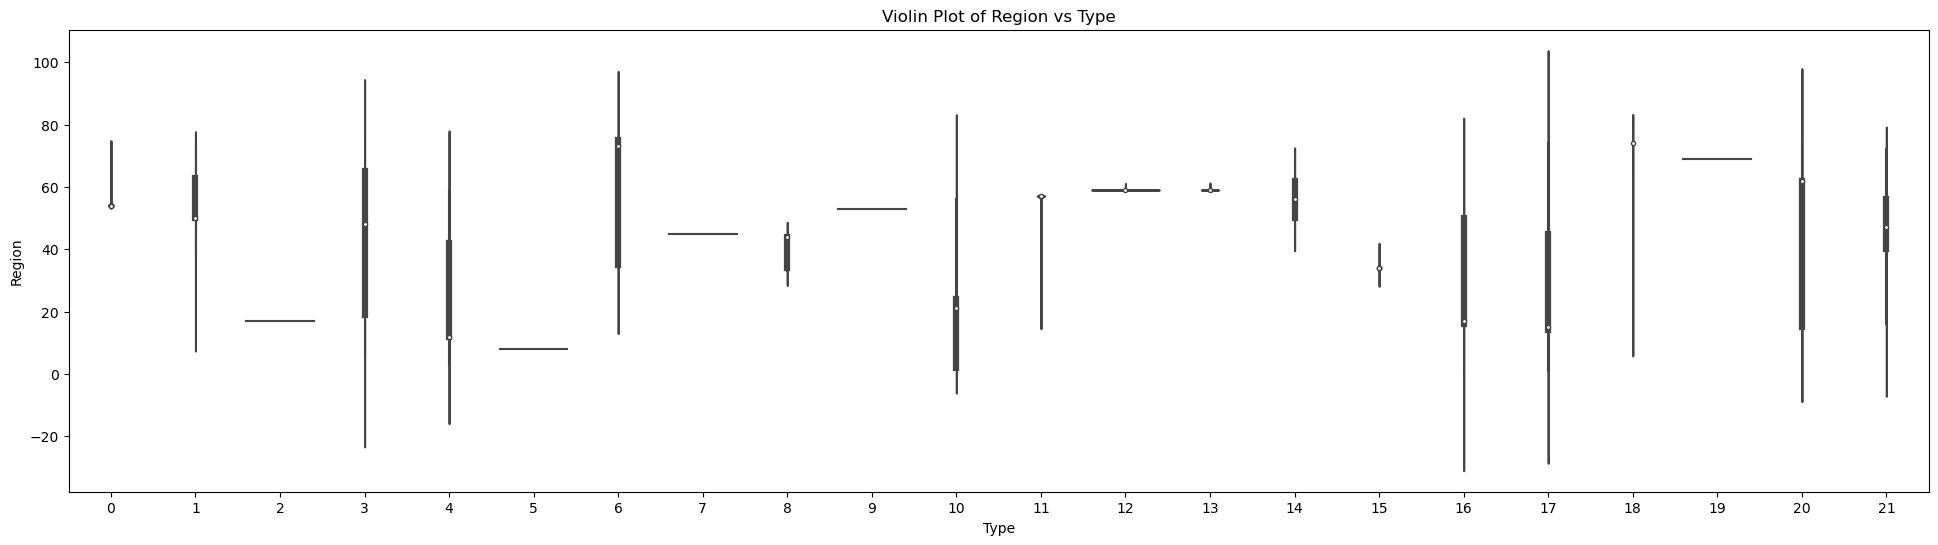

In [58]:
for feature in features:
    plt.figure(figsize=(24, 6))
    sns.violinplot(x='Type', y=feature, data=df)
    plt.title(f'Violin Plot of {feature} vs Type')
    plt.show()

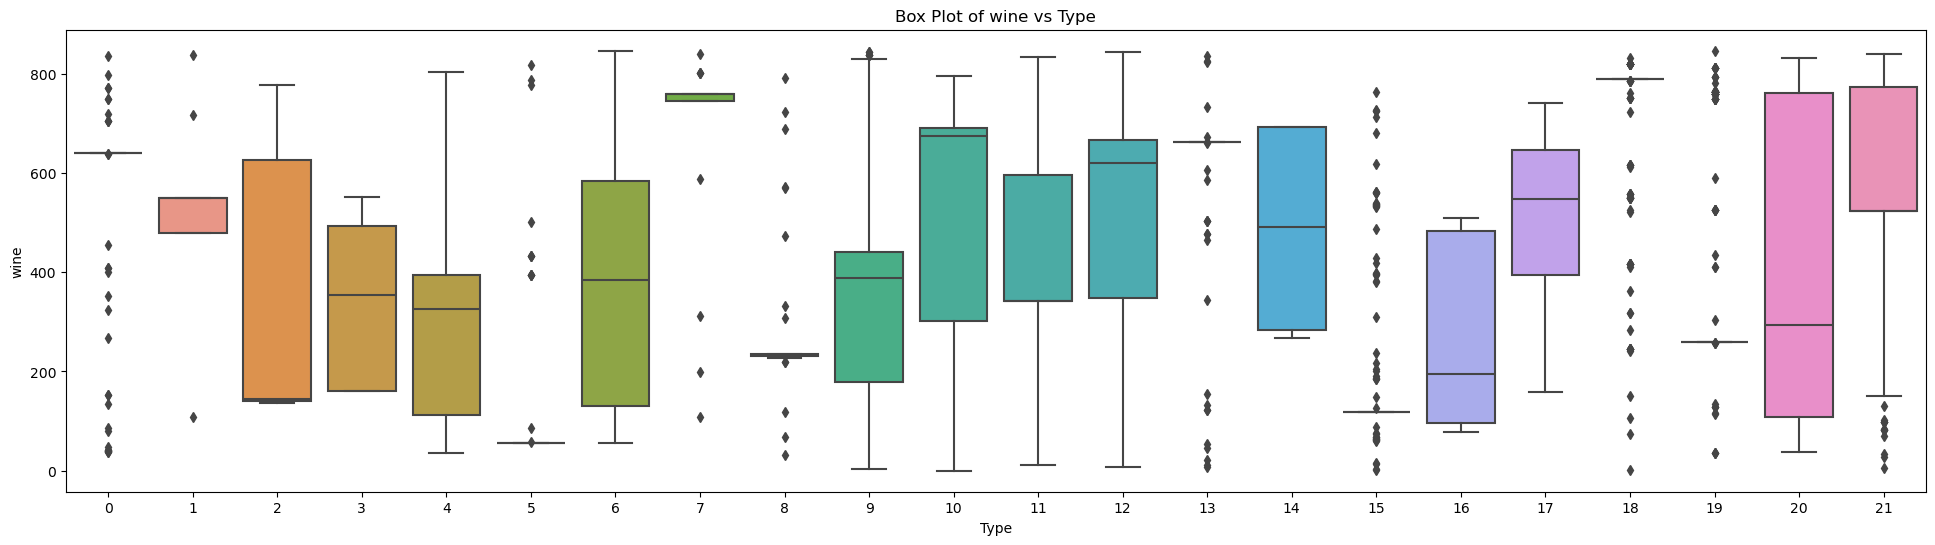

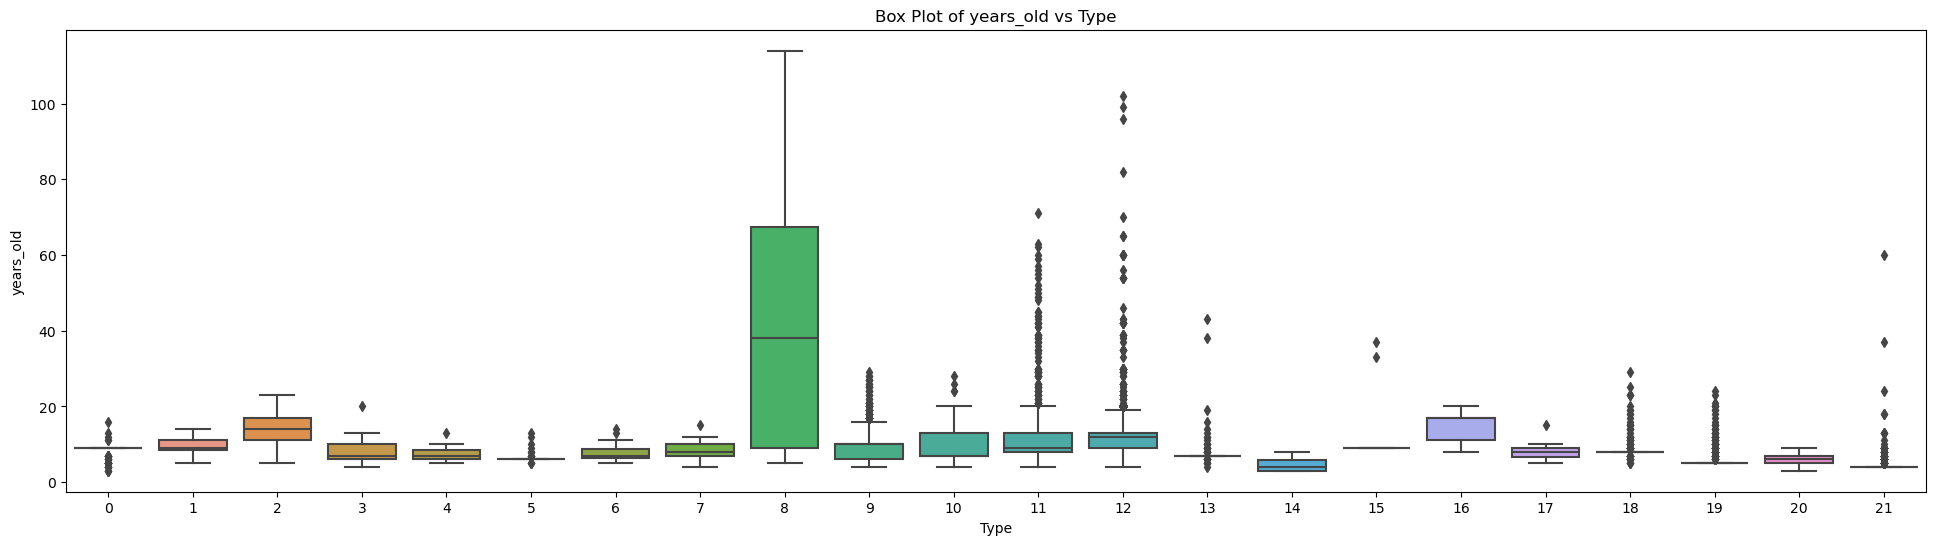

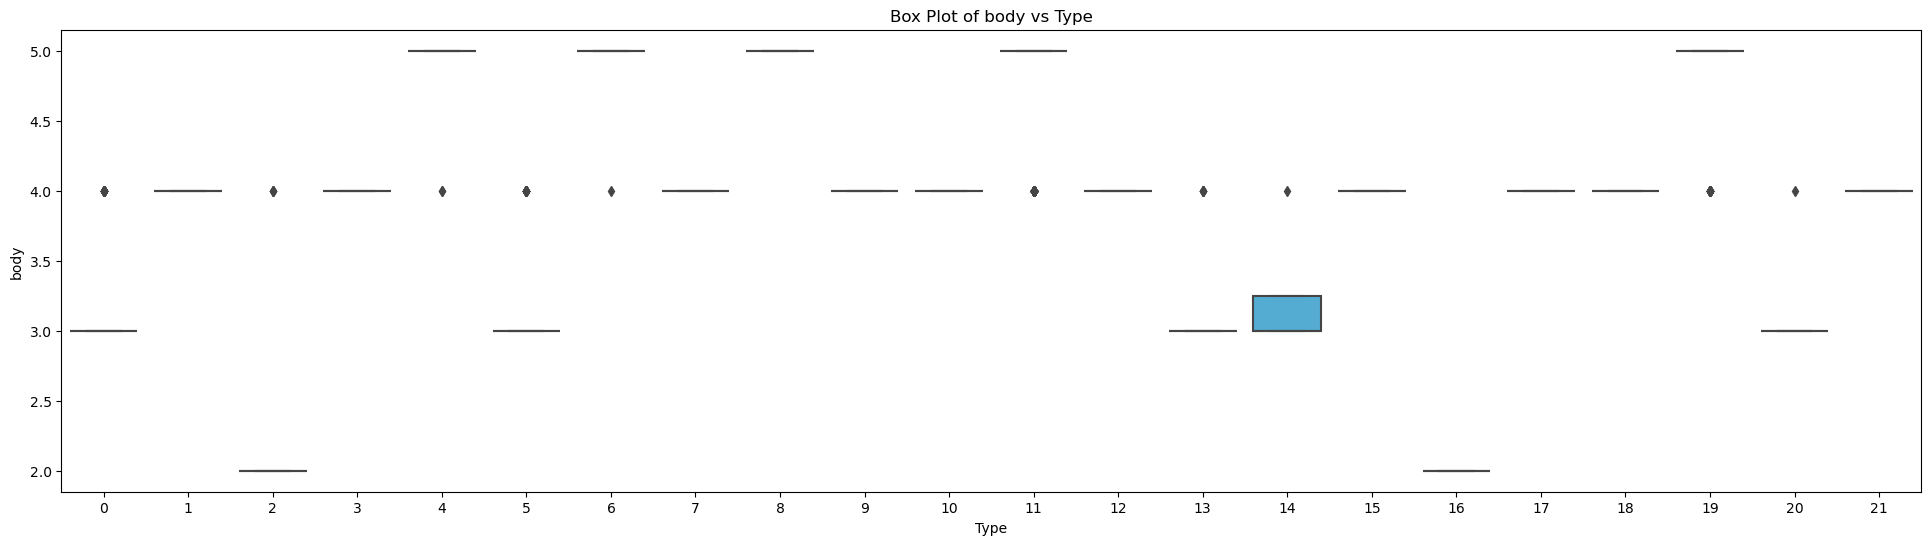

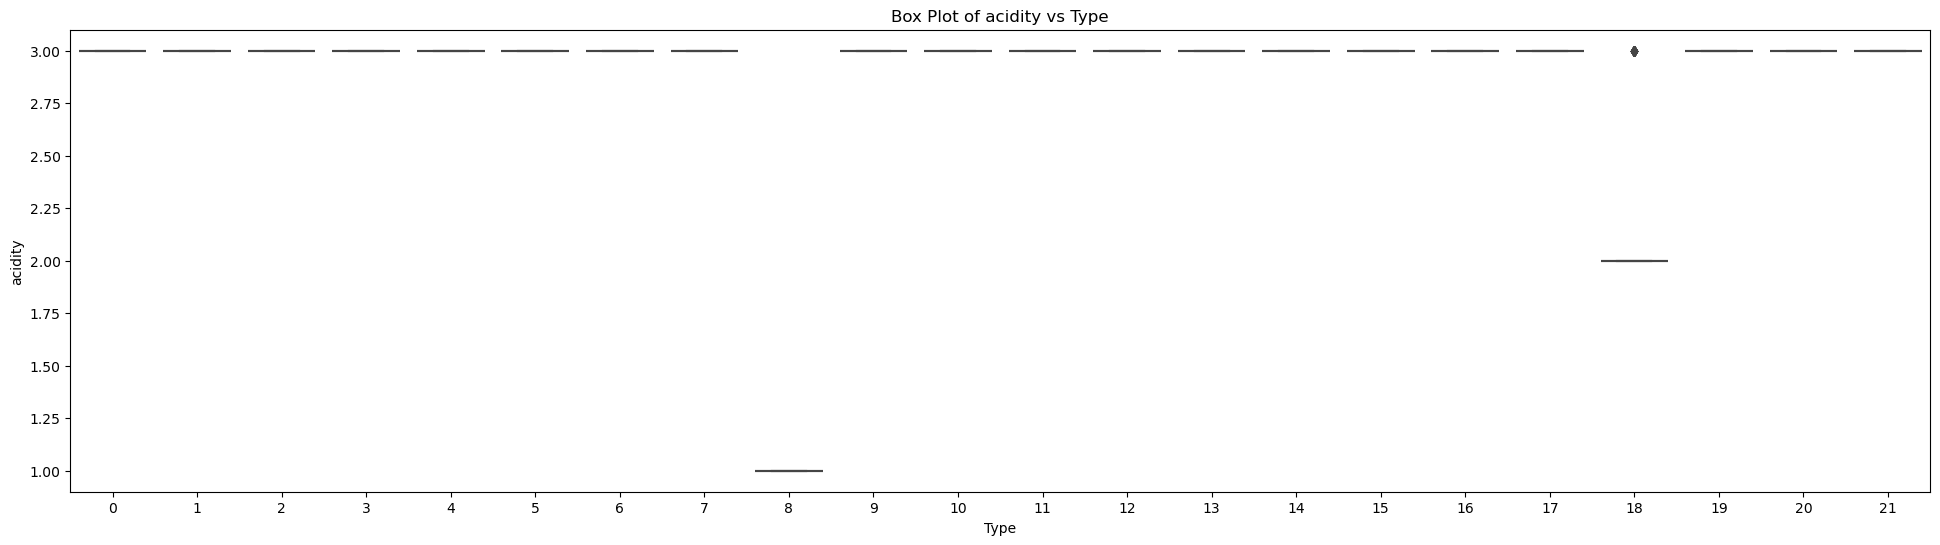

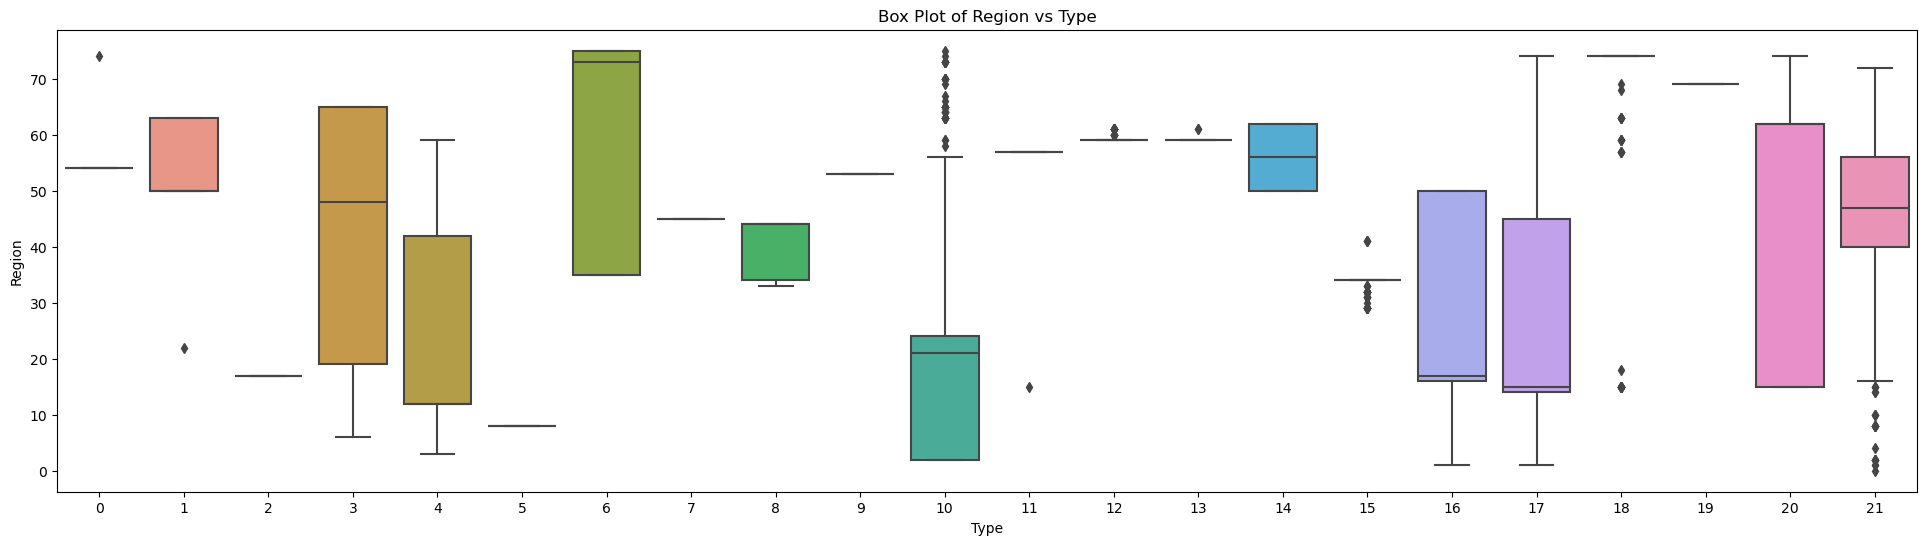

In [59]:
for feature in features:
    plt.figure(figsize=(24, 6))
    sns.boxplot(x='Type', y=feature, data=df)
    plt.title(f'Box Plot of {feature} vs Type')
    plt.show()

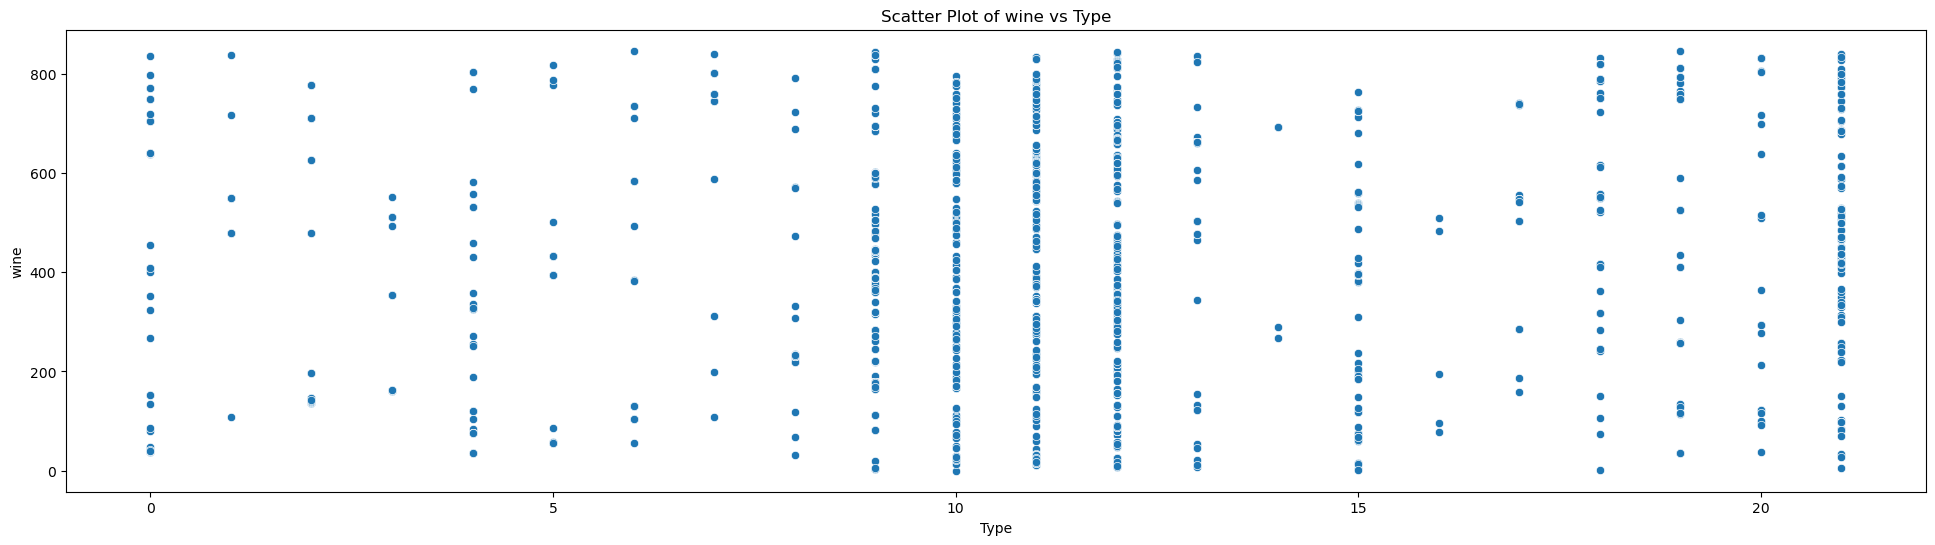

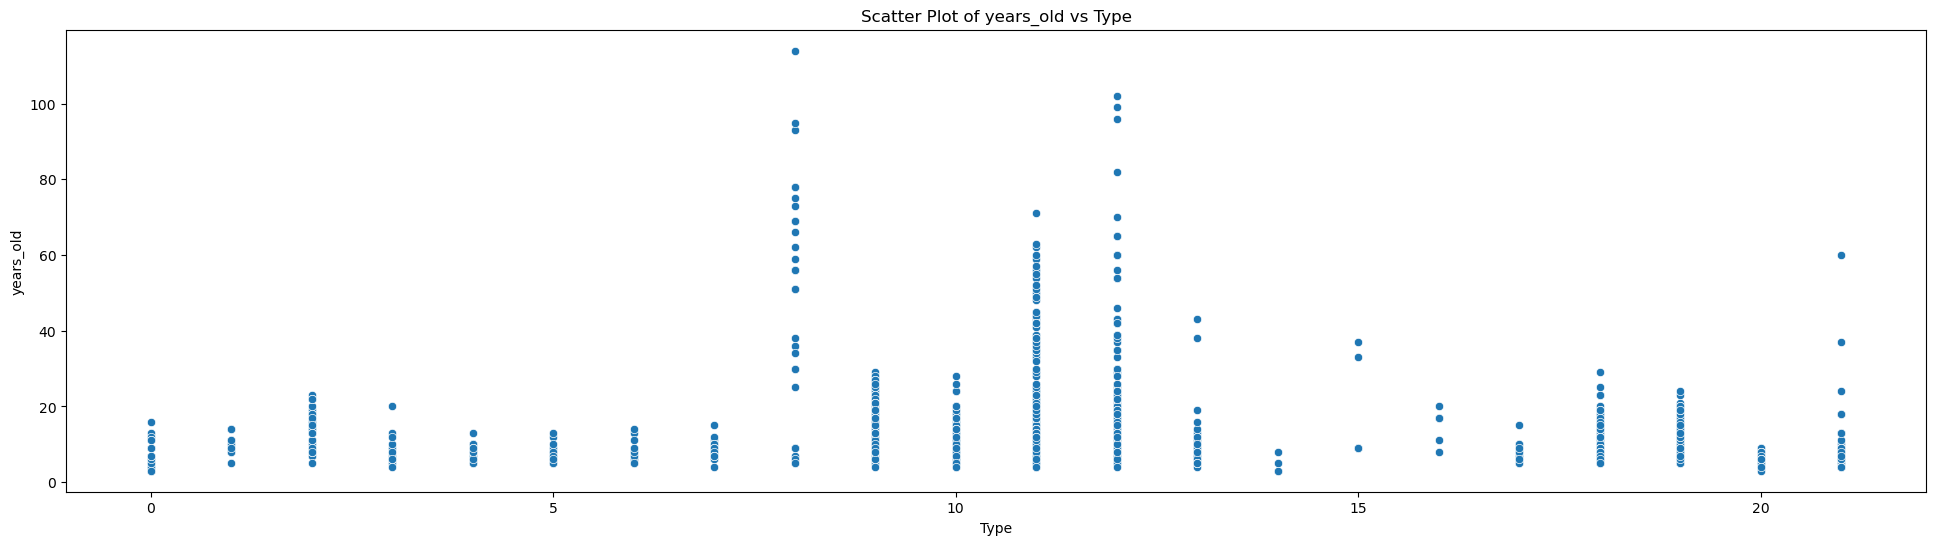

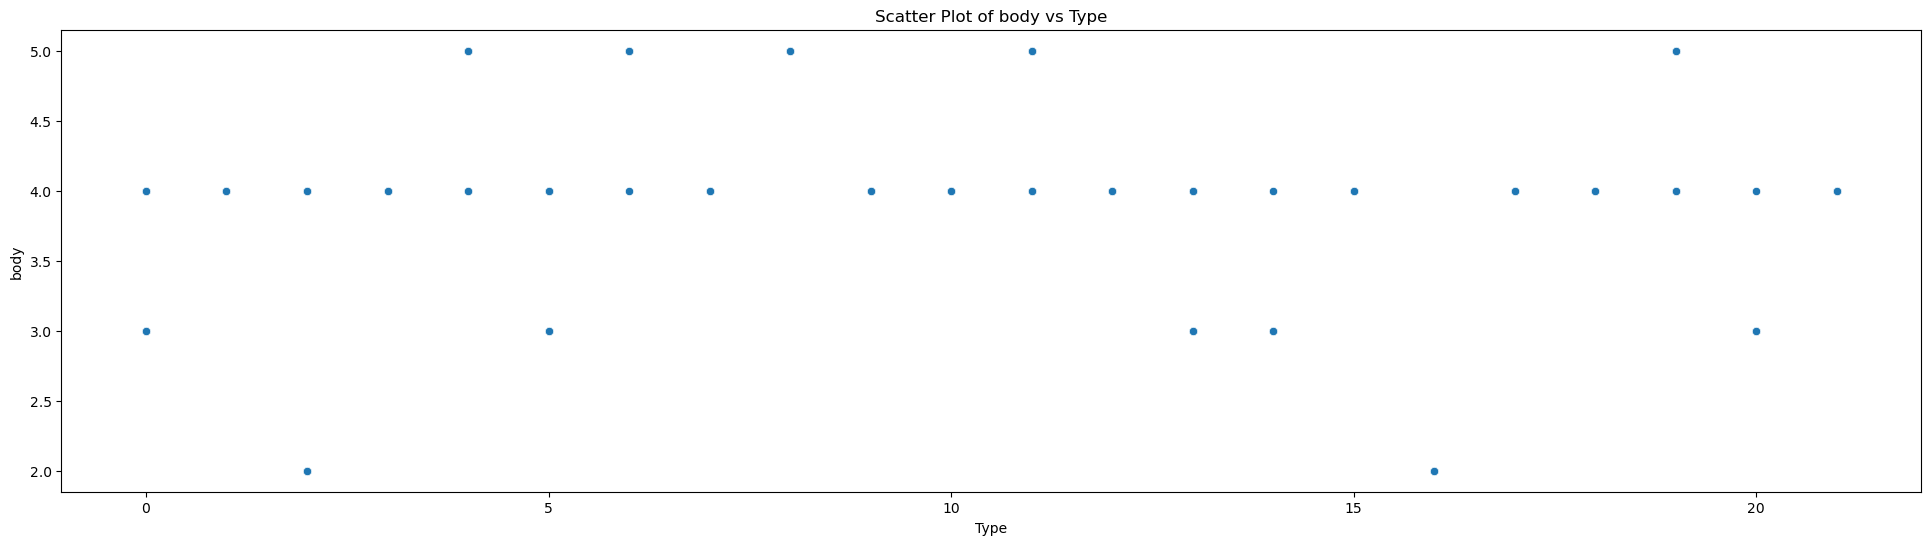

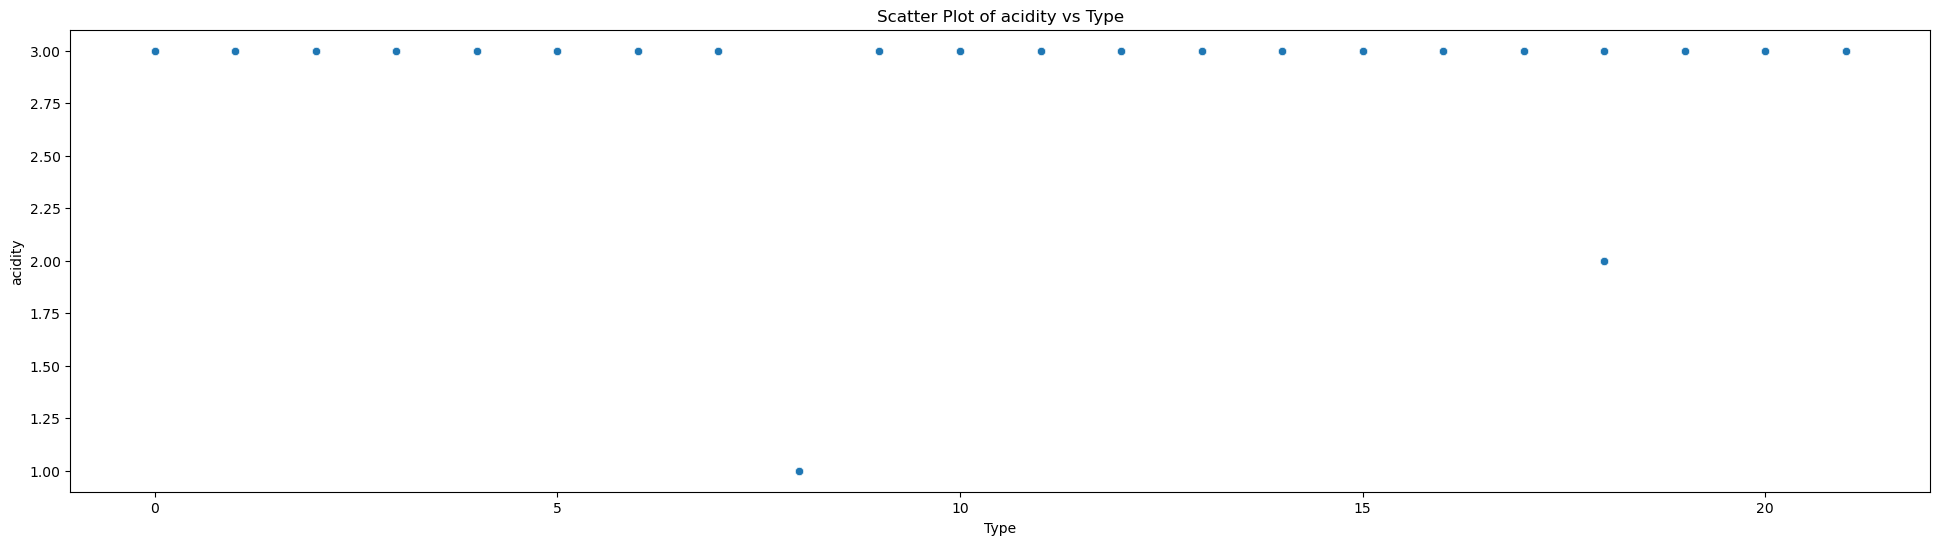

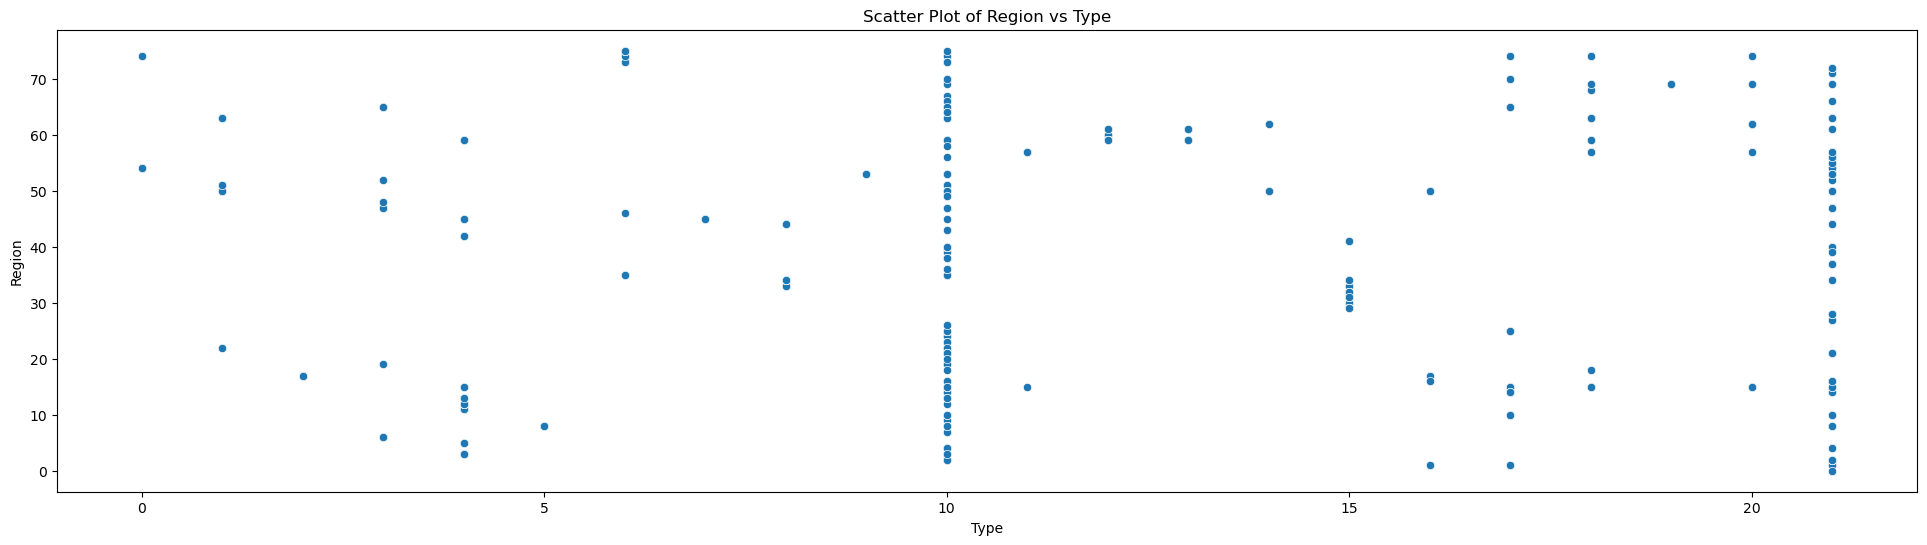

In [60]:
for feature in features:
    plt.figure(figsize=(24, 6))
    sns.scatterplot(x='Type', y=feature, data=df)
    plt.title(f'Scatter Plot of {feature} vs Type')
    plt.show()

### Handle Outliers

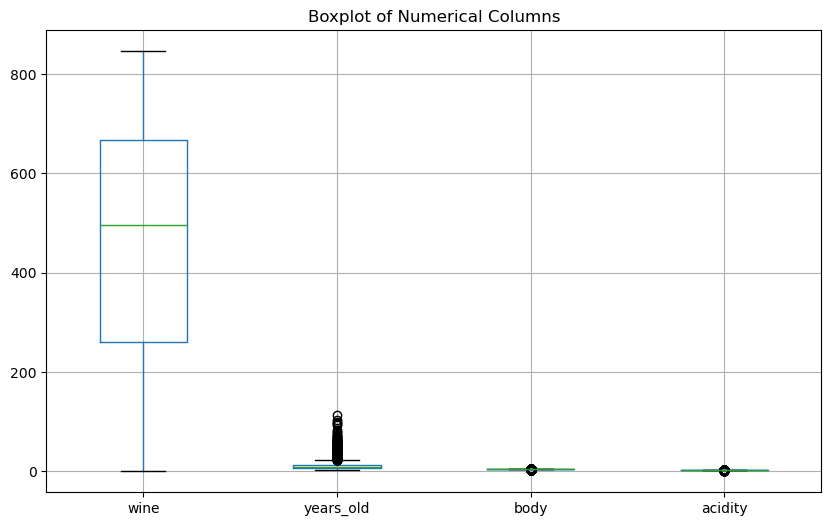

In [62]:
numerical_columns = ['wine', 'years_old', 'body', 'acidity']

# Box plot to visualize outliers
plt.figure(figsize=(10, 6))
df[numerical_columns].boxplot()
plt.title('Boxplot of Numerical Columns')
plt.show()

In [63]:
# Handling outliers using IQR method
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [64]:
# Filtering out outliers
outliers = (df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)
df_no_outliers = df[~outliers.any(axis=1)]

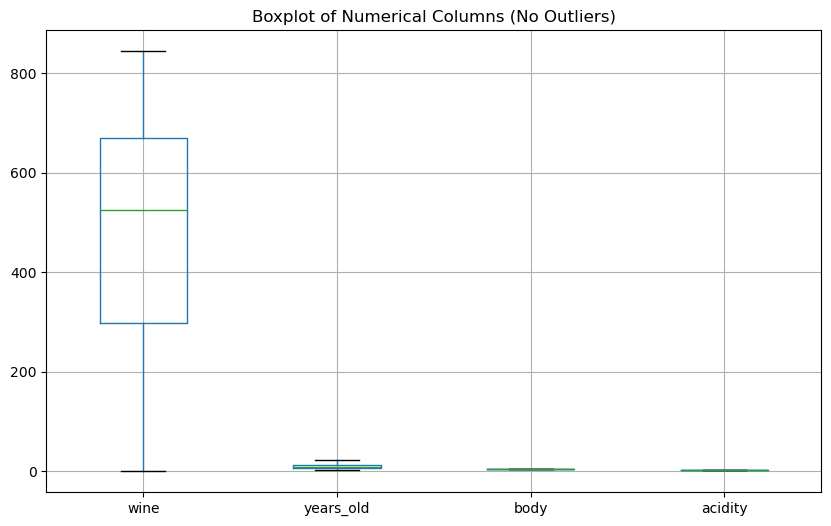

In [65]:
# Box plot of the filtered DataFrame
plt.figure(figsize=(10, 6))
df_no_outliers[numerical_columns].boxplot()
plt.title('Boxplot of Numerical Columns (No Outliers)')
plt.show()

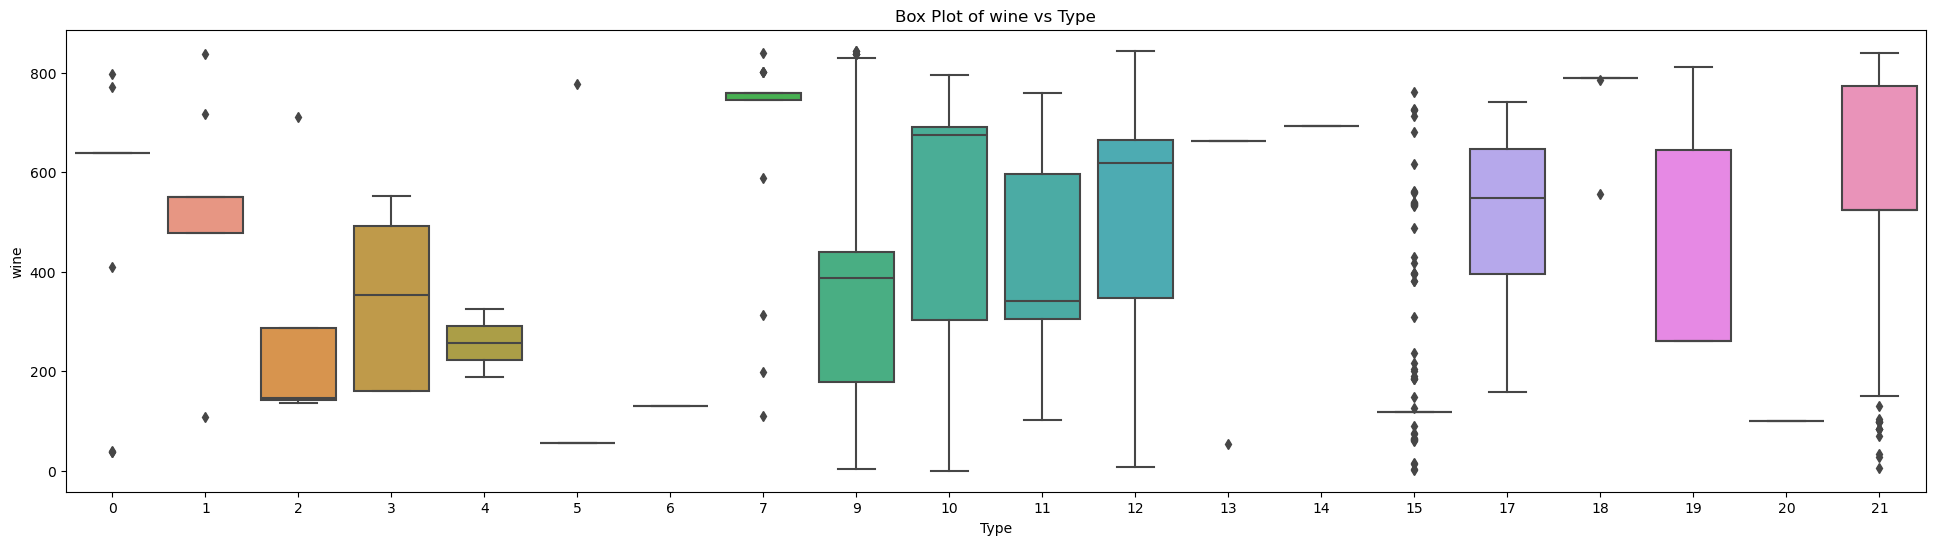

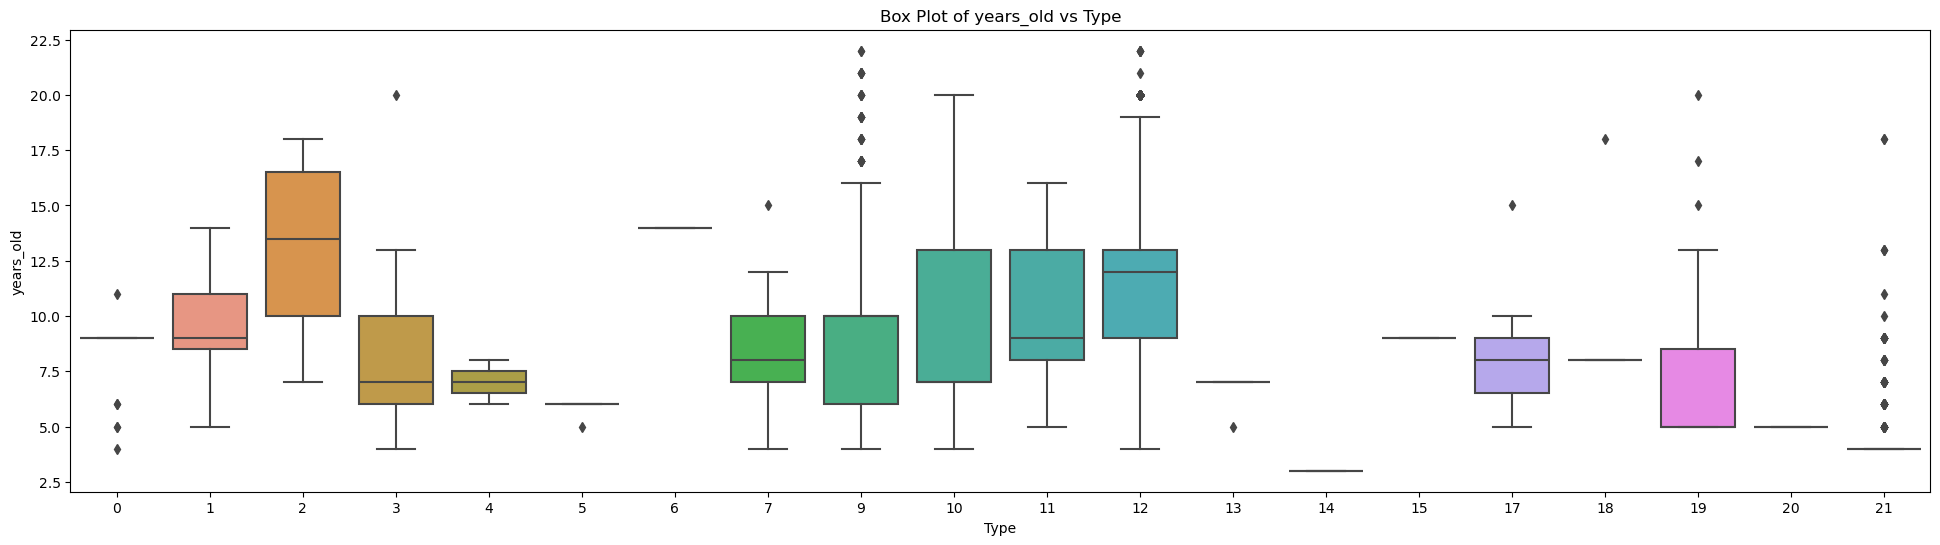

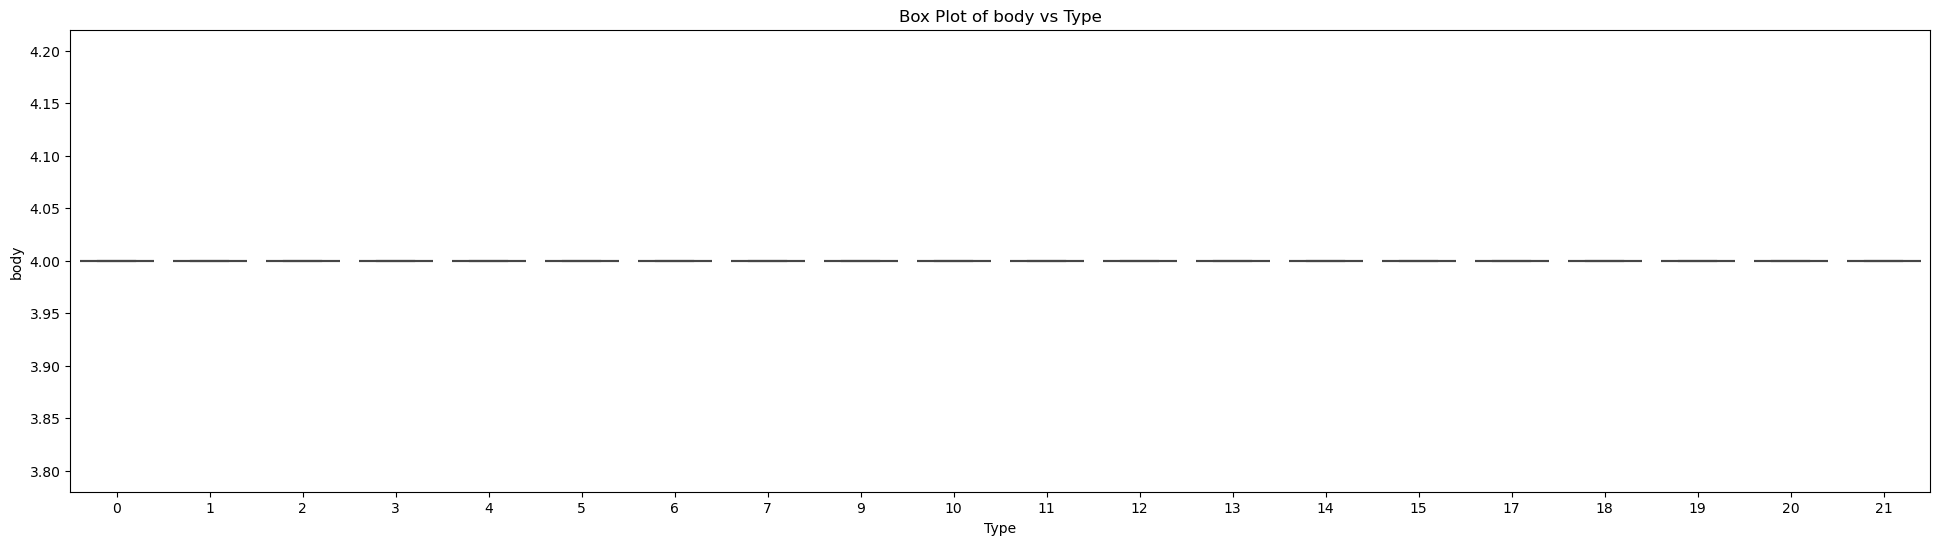

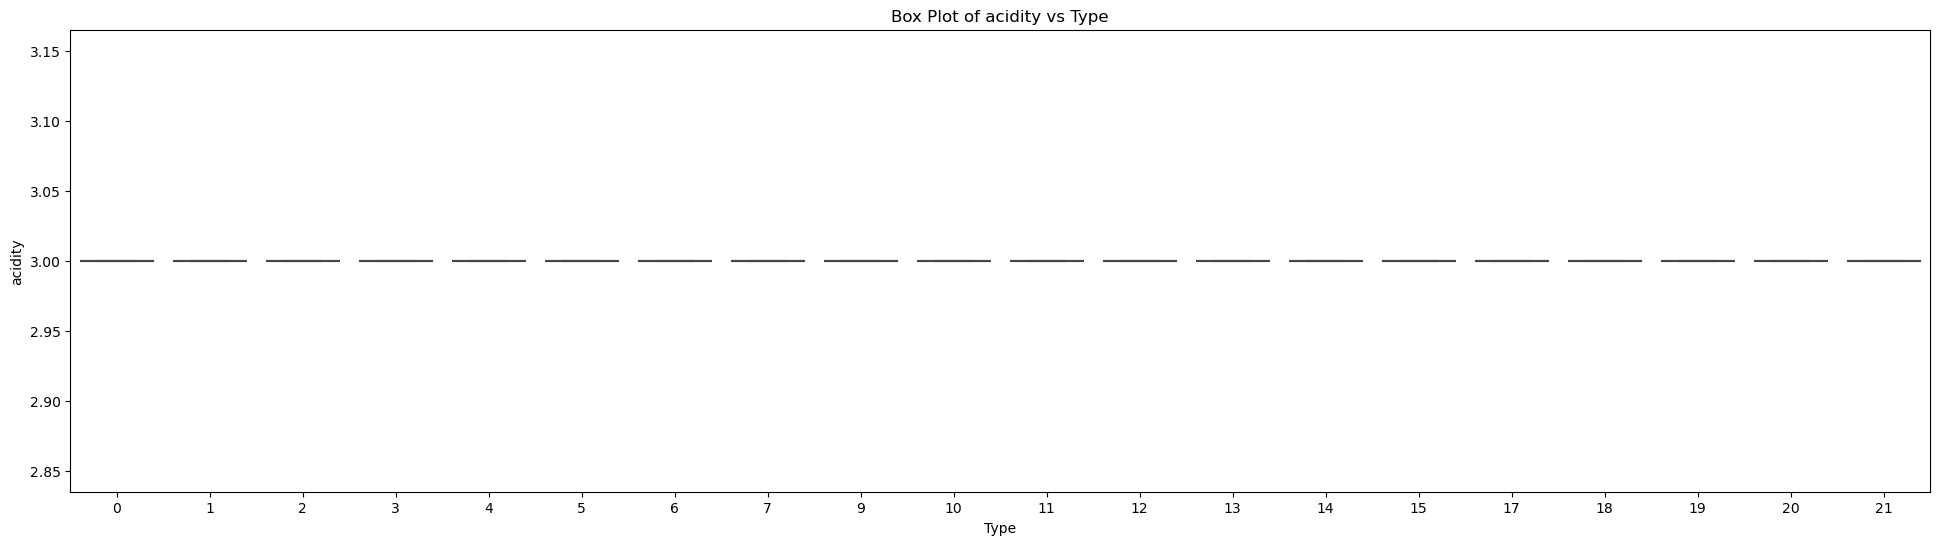

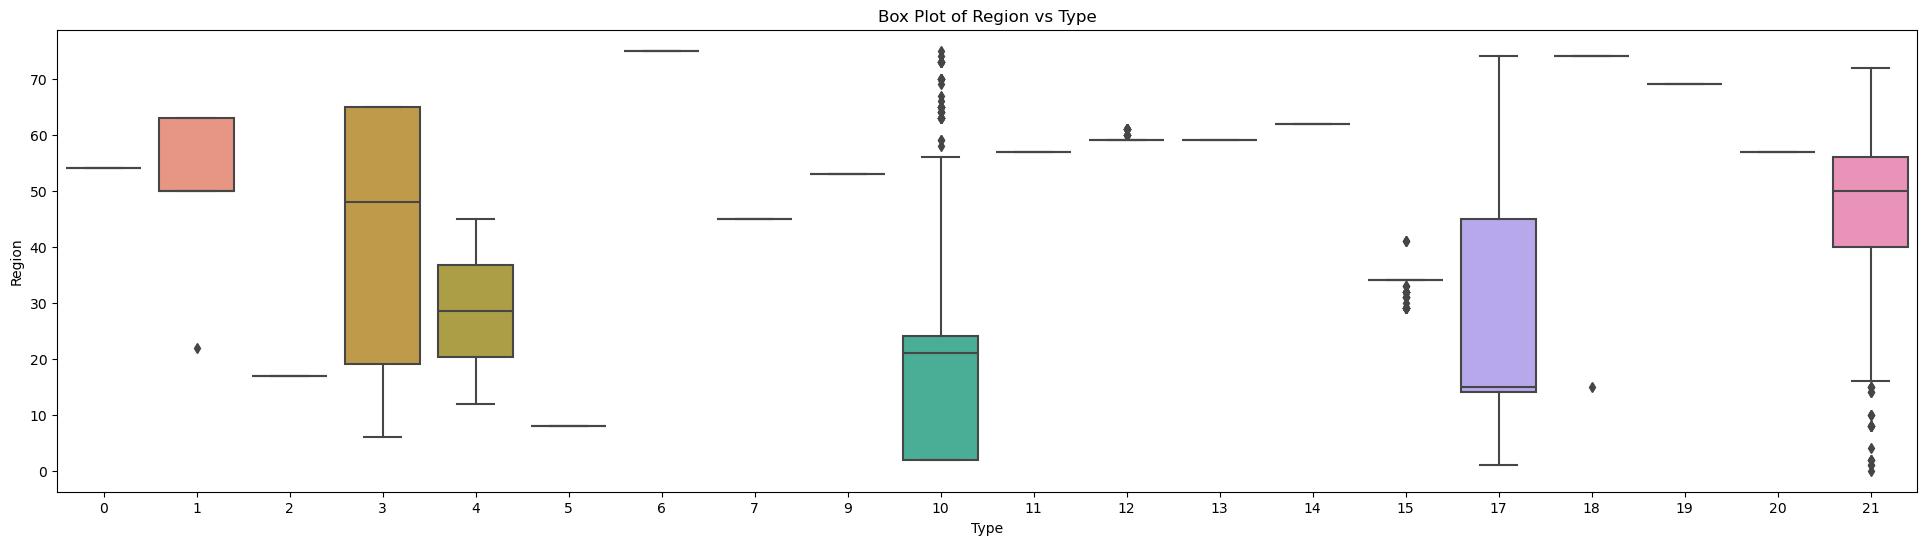

In [66]:
for feature in features:
    plt.figure(figsize=(24, 6))
    sns.boxplot(x='Type', y=feature, data=df_no_outliers)
    plt.title(f'Box Plot of {feature} vs Type')
    plt.show()

### Normalization

In [68]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

In [69]:
df.head()

,wine,years_old,body,acidity,Region,Type
0,0.599291,0.054054,0.666667,1.0,0.986667,10
1,0.790780,0.045045,0.666667,1.0,0.786667,12
2,0.920804,0.054054,1.000000,1.0,0.760000,11
3,0.963357,0.108108,0.666667,1.0,0.786667,12
4,0.963357,0.126126,0.666667,1.0,0.786667,12


In [70]:
df_no_outliers_normalized = df_no_outliers
df_no_outliers_normalized.iloc[:, :-1] = scaler.fit_transform(df_no_outliers_normalized.iloc[:, :-1])

In [71]:
df['acidity'].unique()

array([1. , 0. , 0.5])

In [72]:
df_no_outliers['acidity'].unique()

array([0.])

In [73]:
df = df_no_outliers_normalized

### Train Test Split

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X = df.drop(columns = ['Type'])
y = df['Type']

In [186]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Build ANN

In [79]:
import tensorflow as tf
import keras

In [172]:
from tensorflow.keras import layers

In [168]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [182]:
y_train = pd.DataFrame(y_train)

In [204]:
y_train

353     12
388     12
6070    12
724     10
1363    12
        ..
6586     9
780     10
4614    12
5294    10
1174    12
Name: Type, Length: 3936, dtype: int32

In [231]:
model = Sequential()
model.add(Dense(50, activation="relu", kernel_initializer="he_normal", input_shape=(X_train.shape[1],)))  # He initialization
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
model.add(Dense(25, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
model.add(Dense(1))

In [234]:
model.compile(loss="mean_squared_error", 
              optimizer="adam", 
              metrics=["mean_absolute_error"])

In [239]:
model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
123/123 [==============================] - 0s 4ms/step - loss: 6.9931 - mean_absolute_error: 1.8478 - val_loss: 4.3067 - val_mean_absolute_error: 0.9940
Epoch 2/20
123/123 [==============================] - 0s 3ms/step - loss: 6.7581 - mean_absolute_error: 1.7961 - val_loss: 4.4131 - val_mean_absolute_error: 1.0683
Epoch 3/20
123/123 [==============================] - 0s 3ms/step - loss: 7.1328 - mean_absolute_error: 1.8485 - val_loss: 4.2521 - val_mean_absolute_error: 0.9281
Epoch 4/20
123/123 [==============================] - 0s 3ms/step - loss: 7.0413 - mean_absolute_error: 1.8164 - val_loss: 4.3526 - val_mean_absolute_error: 0.9971
Epoch 5/20
123/123 [==============================] - 0s 3ms/step - loss: 6.9707 - mean_absolute_error: 1.8085 - val_loss: 4.3724 - val_mean_absolute_error: 0.9940
Epoch 6/20
123/123 [==============================] - 0s 2ms/step - loss: 6.9703 - mean_absolute_error: 1.8038 - val_loss: 4.3752 - val_mean_absolute_error: 1.0241
Epoch 7/20
123/1